In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [119]:
hab=pd.read_csv("haberman.csv")
hab.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [84]:
hab.tail()

,age,year,nodes,status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [85]:
#how many rows and column are there
hab.shape

(306, 4)

There are 306 datapoints with 4 features

In [86]:
# columns names present
hab.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [87]:
# lets check the total no of different status present
hab['status'].value_counts()


1    225
2     81
Name: status, dtype: int64

So, the above dataset is unbalanced datasets with 225 value of status 1 and 81 value of status 2.so the analysis we are going to do might not me meaningfull

# 2-d scatter plot

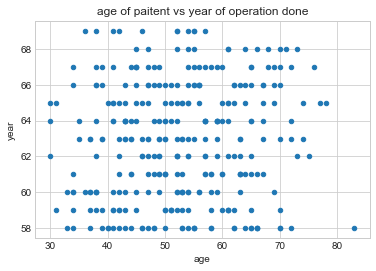

In [88]:
hab.plot(kind='scatter',x='age' ,y='year')
plt.title('age of paitent vs year of operation done')
plt.show()


# observation

From the above plot we are not able to derive more information or it does not serve anything other than some scattered blue lines and range of values. Since plotting a scatter plot for any pair of features would not be as productive for this case, I will switch to using Seaborn plotting API for plotting all possible pairs.

### Using Seaborn to plot the data points so that each datapoints belonging to different classses as coloured differently

#### seaborn scatter plot 1- age vs year

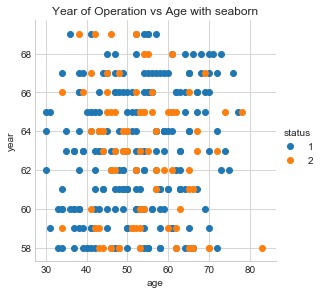

In [90]:
sns.set_style('whitegrid')
sns.FacetGrid(hab,hue='status',size=4).map(plt.scatter,'age','year').add_legend()
plt.title('Year of Operation vs Age with seaborn')
plt.show()
# separating the 2 status is difficult

# observation

No discerining decision boundary seems to be possible that can be drawn to distinguish the two classes.

#### seaborn scatter plot 2- age vs nodes 

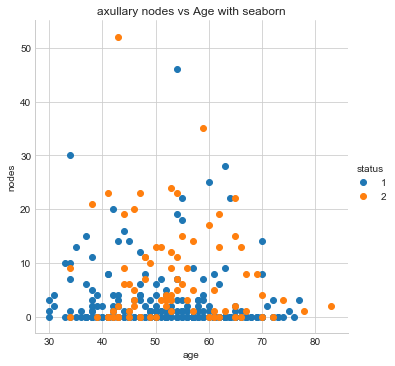

In [139]:
sns.set_style('whitegrid')
sns.FacetGrid(hab,hue='status',size=5).map(plt.scatter,'age','nodes').add_legend()
plt.title('axullary nodes vs Age with seaborn')
plt.show()

# observation

From the plot it is clear that we cannot draw any line or a curve that can discern the two classes easily.

#### seaborn scatter plot 3- nodes vs  year 

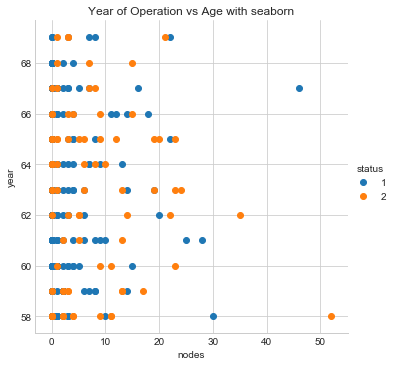

In [92]:
sns.set_style('whitegrid')
sns.FacetGrid(hab,hue='status',size=5).map(plt.scatter,'nodes','year').add_legend()
plt.title('Year of Operation vs Nodes with seaborn')
plt.show()

# observation

Separating any of the classes does not look as simple. No linear line, in fact, even a curve seems to be incapable of making out a discerning decision boundary that can seperate the two classes. 

# conclusion

plot of any pair are insufficient to diffrentiate the two status

# pair plot

### pair plot is same as indivisual scatter plot. pair plots helps to give better analysis of two features  and it is usefull when large no of features are present

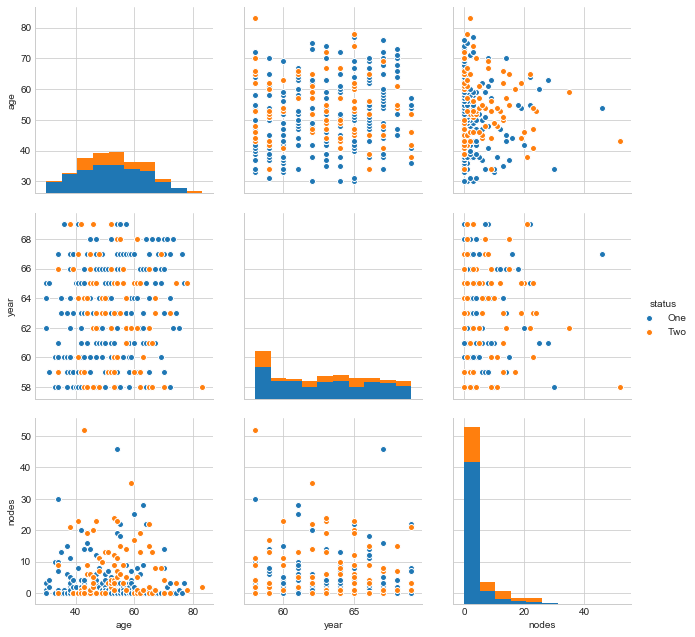

In [93]:
plt.close
hab['status'] = hab['status'].apply(lambda x: 'One' if x == 1 else 'Two')
sns.set_style('whitegrid')
sns.pairplot(hab,hue='status',size=3)
plt.show()


#  observation

No two features seem to be able to discern between the two classes.

# Histogram,PDF,CDF

#### histogram of nodes

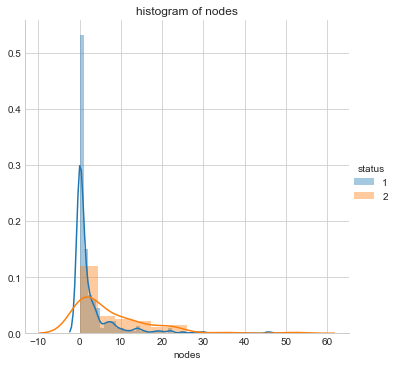

In [152]:
sns.FacetGrid(hab, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title('histogram of nodes')
plt.show();

# observation

The observation which we can make from the above 1-d plot or histogram. There are more axillary node detectted <=5 from both the status , and the values goes down after >=15

#### histogram of age 

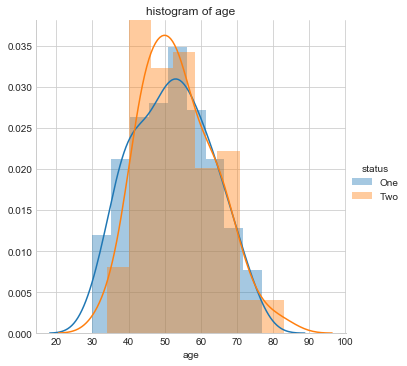

In [14]:
sns.FacetGrid(hab, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('histogram of age')
plt.show();

# observation

There is crazy overlap between two groups. its very hard to overcome with any difference

#### histogram of year

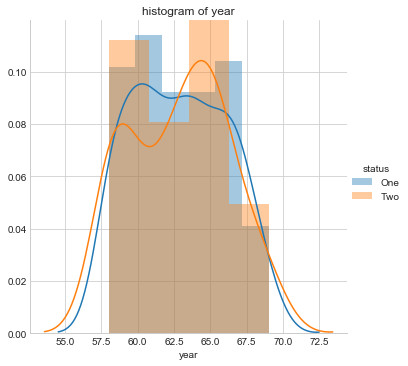

In [15]:
sns.FacetGrid(hab, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title('histogram of year')
plt.show();

# observation

There is a overlap between the histograms corresponding to each class for all the three features! 

# PDF and CDF

#### pdf and cdf of age of class-1 

[0.01134752 0.02269504 0.02647754 0.01985816 0.03498818 0.03498818
 0.01985816 0.02364066 0.01323877 0.00567376]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


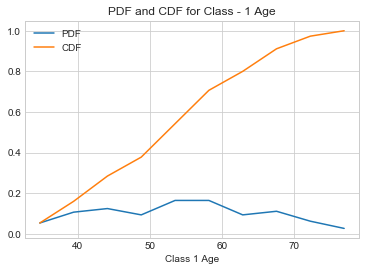

In [153]:
hab_1 = hab[hab['status'] == 1]
plt.close()
counts, bin_edges = np.histogram(hab_1['age'], bins= 10, density = True)
print(counts)
print(bin_edges)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label = 'PDF')
plt.plot(bin_edges[1:], cdf, label = 'CDF')
plt.xlabel('Class 1 Age')
plt.title('PDF and CDF for Class - 1 Age')
plt.legend()
plt.show()


# observation

From the PDF , we can infer that most people who belonged to class 1 (survived for more than 5 yrs) belonged to the age group 50 to 60 yrs. From the CDF, about 80% of patients in class 1 are under the age of 65 (or slightly less than 65, greater than 60). On the other hand, all the patients of class 1 fall under the age of 80 (or under the age of 77-78).

#### PDF and CDF of age of class -2

[0.00755858 0.02519526 0.04031242 0.04031242 0.02771479 0.02519526
 0.02015621 0.01007811 0.00503905 0.00251953]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


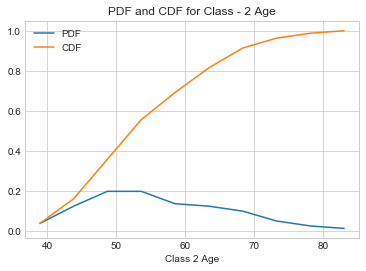

In [154]:
hab_1 = hab[hab['status'] == 2]
plt.close()
counts, bin_edges = np.histogram(hab_1['age'], bins= 10, density = True)
print(counts)
print(bin_edges)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label = 'PDF')
plt.plot(bin_edges[1:], cdf, label = 'CDF')
plt.xlabel('Class 2 Age')
plt.title('PDF and CDF for Class - 2 Age')
plt.legend()
plt.show()


# observation

From the above pdf ,we can infer that most of the age group(who will not survive more than 5 years) lies between 45 to 55 age.The CDF also crosses 80% for age slightly less than 65 but more than 60 (similar to class 1 patients). However, there are patients of age more than 80 in class 2.

#### PDF and CDF of age of both class

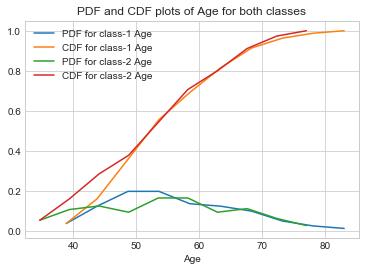

In [155]:

counts, bin_edges = np.histogram(hab_1['age'], bins= 10, density = True)
# print(counts)
# print(bin_edges)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.title('PDF and CDF plots of Age for both classes')
plt.plot(bin_edges[1:], pdf, label = 'PDF for class-1 Age')
plt.plot(bin_edges[1:], cdf, label = 'CDF for class-1 Age')
plt.xlabel('Age')
counts, bin_edges = np.histogram(hab_2['age'], bins = 10, density = True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label = 'PDF for class-2 Age')
plt.plot(bin_edges[1:], cdf, label = 'CDF for class-2 Age')
plt.legend()
plt.show()

# observation

We can say that it is difficult to distinguish the two classes using Age. This is what we found when we plotted histogram.

#### PDF and CDF of year of class -1

[0.16969697 0.0969697  0.09292929 0.06464646 0.08888889 0.09292929
 0.06060606 0.08888889 0.08484848 0.06868687]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


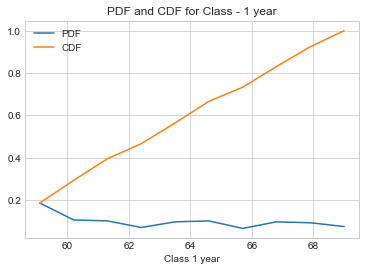

In [156]:
hab_1 = hab[hab['status'] == 1]
plt.close()
counts, bin_edges = np.histogram(hab_1['year'], bins= 10, density = True)
print(counts)
print(bin_edges)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label = 'PDF')
plt.plot(bin_edges[1:], cdf, label = 'CDF')
plt.xlabel('Class 1 year')
plt.title('PDF and CDF for Class - 1 year')
plt.legend()
plt.show()

#### PDF and CDF of year of Class-2

[0.23569024 0.04489338 0.03367003 0.07856341 0.08978676 0.08978676
 0.14590348 0.06734007 0.04489338 0.07856341]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


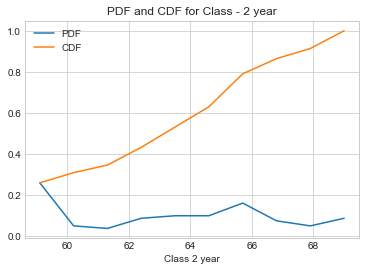

In [123]:
hab_2 = hab[hab['status'] == 2]
plt.close()
counts, bin_edges = np.histogram(hab_2['year'], bins= 10, density = True)
print(counts)
print(bin_edges)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label = 'PDF')
plt.plot(bin_edges[1:], cdf, label = 'CDF')
plt.xlabel('Class 2 year')
plt.title('PDF and CDF for Class - 2 year')
plt.legend()
plt.show()

#### PDF and CDF of year of both class

[0.16969697 0.0969697  0.09292929 0.06464646 0.08888889 0.09292929
 0.06060606 0.08888889 0.08484848 0.06868687]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.23569024 0.04489338 0.03367003 0.07856341 0.08978676 0.08978676
 0.14590348 0.06734007 0.04489338 0.07856341]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


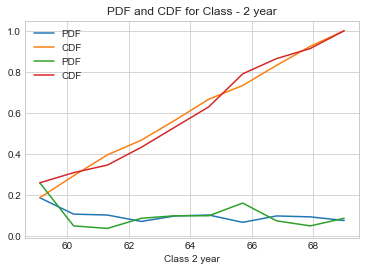

In [157]:
hab_1 = hab[hab['status'] == 1]
counts, bin_edges = np.histogram(hab_1['year'], bins= 10, density = True)
print(counts)
print(bin_edges)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label = 'PDF')
plt.plot(bin_edges[1:], cdf, label = 'CDF')
plt.xlabel('Class 1 year')
plt.title('PDF and CDF for Class - 1 year')
plt.legend()

hab_2 = hab[hab['status'] == 2]
counts, bin_edges = np.histogram(hab_2['year'], bins= 10, density = True)
print(counts)
print(bin_edges)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label = 'PDF')
plt.plot(bin_edges[1:], cdf, label = 'CDF')
plt.xlabel('Class 2 year')
plt.title('PDF and CDF for Class - 2 year')
plt.legend()
plt.show()

# observation

its very hard to derive any classification based on year data itself

#### PDF and CDF of nodes of class -1

[0.18164251 0.0173913  0.00483092 0.0057971  0.00386473 0.00096618
 0.00193237 0.         0.         0.00096618]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


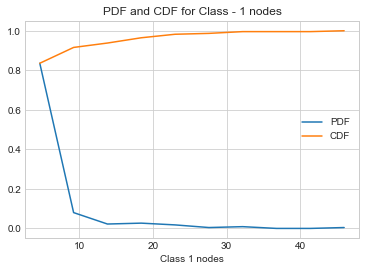

In [158]:
hab_1 = hab[hab['status'] == 1]
plt.close()
counts, bin_edges = np.histogram(hab_1['nodes'], bins= 10, density = True)
print(counts)
print(bin_edges)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label = 'PDF')
plt.plot(bin_edges[1:], cdf, label = 'CDF')
plt.xlabel('Class 1 nodes')
plt.title('PDF and CDF for Class - 1 nodes')
plt.legend()
plt.show()


#### pdf and cdf of nodes of class -2

[0.18164251 0.0173913  0.00483092 0.0057971  0.00386473 0.00096618
 0.00193237 0.         0.         0.00096618]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


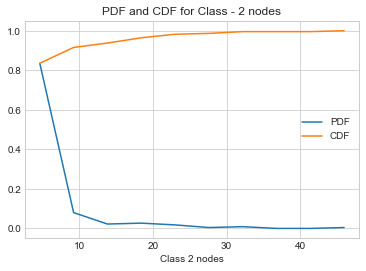

In [132]:
hab_2 = hab[hab['status'] == 1]
plt.close()
counts, bin_edges = np.histogram(hab_2['nodes'], bins= 10, density = True)
print(counts)
print(bin_edges)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label = 'PDF')
plt.plot(bin_edges[1:], cdf, label = 'CDF')
plt.xlabel('Class 2 nodes')
plt.title('PDF and CDF for Class - 2 nodes')
plt.legend()
plt.show()

#### PDF and CDF of nodes of both class

[0.18164251 0.0173913  0.00483092 0.0057971  0.00386473 0.00096618
 0.00193237 0.         0.         0.00096618]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.10921178 0.02849003 0.02611586 0.00949668 0.01424501 0.
 0.00237417 0.         0.         0.00237417]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


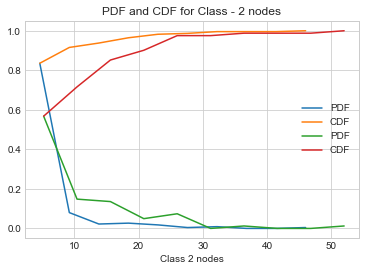

In [131]:
hab_1 = hab[hab['status'] == 1]
counts, bin_edges = np.histogram(hab_1['nodes'], bins= 10, density = True)
print(counts)
print(bin_edges)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label = 'PDF')
plt.plot(bin_edges[1:], cdf, label = 'CDF')
plt.xlabel('Class 1 nodes')
plt.title('PDF and CDF for Class - 1 nodes')
plt.legend()

hab_2 = hab[hab['status'] == 2]
counts, bin_edges = np.histogram(hab_2['nodes'], bins= 10, density = True)
print(counts)
print(bin_edges)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label = 'PDF')
plt.plot(bin_edges[1:], cdf, label = 'CDF')
plt.xlabel('Class 2 nodes')
plt.title('PDF and CDF for Class - 2 nodes')
plt.legend()
plt.show()

# observation

i have noted that almost 80% class-1 patients had number of axiliary nodes detected < 5, 60% of class-2 patients also had the same number of detections.

# box plot 

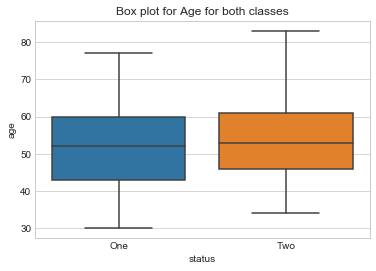

In [21]:
sns.boxplot(x = 'status', y = 'age', data = hab)
plt.title('Box plot for Age for both classes')
plt.show()


# observation


For class - 1:
Most of the datapoints lie within 30 and around 78 (ie, within the whiskers)
Age = 60 is the 75th percentile, so 75% of the datapoints are of age less than 60 who survived for more than 5 years. 50th percentile looks to be between 50 and 54, while 25th percentile value is some value less than 45.

For class - 2:
Most of the datapoints lie less than 85 and around 35 (ie, within the whiskers).
75th percentile is little more than 60 and less than 65, 50th percentile is almost the same value as the 50th percentile of class 2. 25th percentile is some value more than 45. 

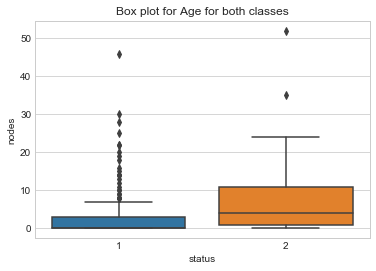

In [149]:
sns.boxplot(x = 'status', y = 'nodes', data = hab)
plt.title('Box plot for Age for both classes')
plt.show()


In [151]:
print(np.median(hab_2['nodes']))
print(np.percentile(hab_2['nodes'], 25))
print(np.mean(hab_2['nodes']))

0.0
0.0
2.7911111111111113


# observation

For Class 1-
The 75th percentile looks to be 4, that is 75% percent of the people who underwent surgery and survived for more than 5 years had less than atleat 5 axillary nodes detected. Since the top whisker is below 10, so most survivors had less than 10 detections of axillary nodes.25 and 50 percnt are almost 0. We can say that 50% are having 0 axillary nodes detected but still there are 50 % more than 0 so its difficult to distinguis

For class - 2: 75th percentiles is greater than 10 (looks like 12). 50th percentile is slighly more than the 75th percentile of class-1, around 5. This means that 50% of the people who did not survive had number of node detections more than 5.

In [148]:
print(np.median(hab_1['nodes']))
print(np.percentile(hab_1['nodes'], 25))

# Let's also check the mean
print(np.mean(hab_1['nodes']))

4.0
1.0
7.45679012345679


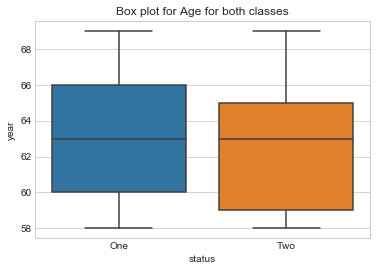

In [23]:
sns.boxplot(x = 'status', y = 'year', data = hab)
plt.title('Box plot for Age for both classes')
plt.show()


# observation


For class - 1: 75th percentile is the year 1966. That is, 75% of the people survived for more than 5 years underwent surgery before 1966. 1963 is the 50th percentile year of percetile and 25% of the patients who survived for more than 5 years were operated before 1960.

For class 2: Those who did not survive, 75% of them were operated before 1965. This class has the same 50th percentile as class - 1- 1963, ie, 50% of the people who did not survive were operated before 1963. 25th percentile is year 1959.

# violin plot

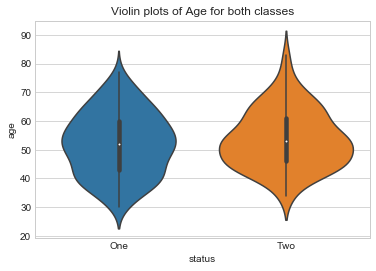

In [116]:
sns.violinplot(x = 'status', y = 'age', data = hab)
plt.title('Violin plots of Age for both classes')
plt.show()

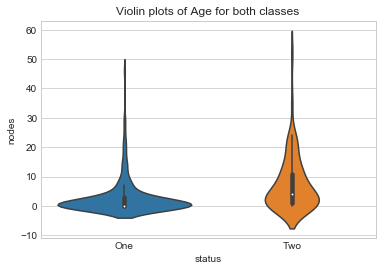

In [117]:
sns.violinplot(x = 'status', y = 'nodes', data = hab)
plt.title('Violin plots of Age for both classes')
plt.show()

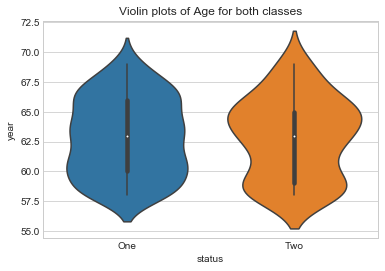

In [118]:
sns.violinplot(x = 'status', y = 'year', data = hab)
plt.title('Violin plots of Age for both classes')
plt.show()

# observation

observation we have made with boxplot is same as violin plot